In [2]:
import pandas as pd

foodCSV = 'wfp_food_prices_phl.csv'
foodData = pd.read_csv(foodCSV)

print(foodData.head())
print(foodData.columns)

         date                   admin1               admin2            market  \
0       #date               #adm1+name           #adm2+name  #loc+market+name   
1  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   
2  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   
3  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   
4  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   

    latitude   longitude            category                commodity  \
0   #geo+lat    #geo+lon          #item+type               #item+name   
1  14.604167  120.982222  cereals and tubers     Maize flour (yellow)   
2  14.604167  120.982222  cereals and tubers  Rice (milled, superior)   
3  14.604167  120.982222  cereals and tubers  Rice (milled, superior)   
4  14.604167  120.982222  cereals and tubers   Rice (regular, milled)   

         unit         priceflag         pricetype   currency   price  \
0 

C:\Users\User\AppData\Local\Temp\ipykernel_9492\2105571810.py:4: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  foodData = pd.read_csv(foodCSV)


C:\Users\User\AppData\Local\Temp\ipykernel_9492\3469321619.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  foodData['date'] = pd.to_datetime(foodData['date'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_9492\3469321619.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_increase = pivoted.pct_change().fillna(0)


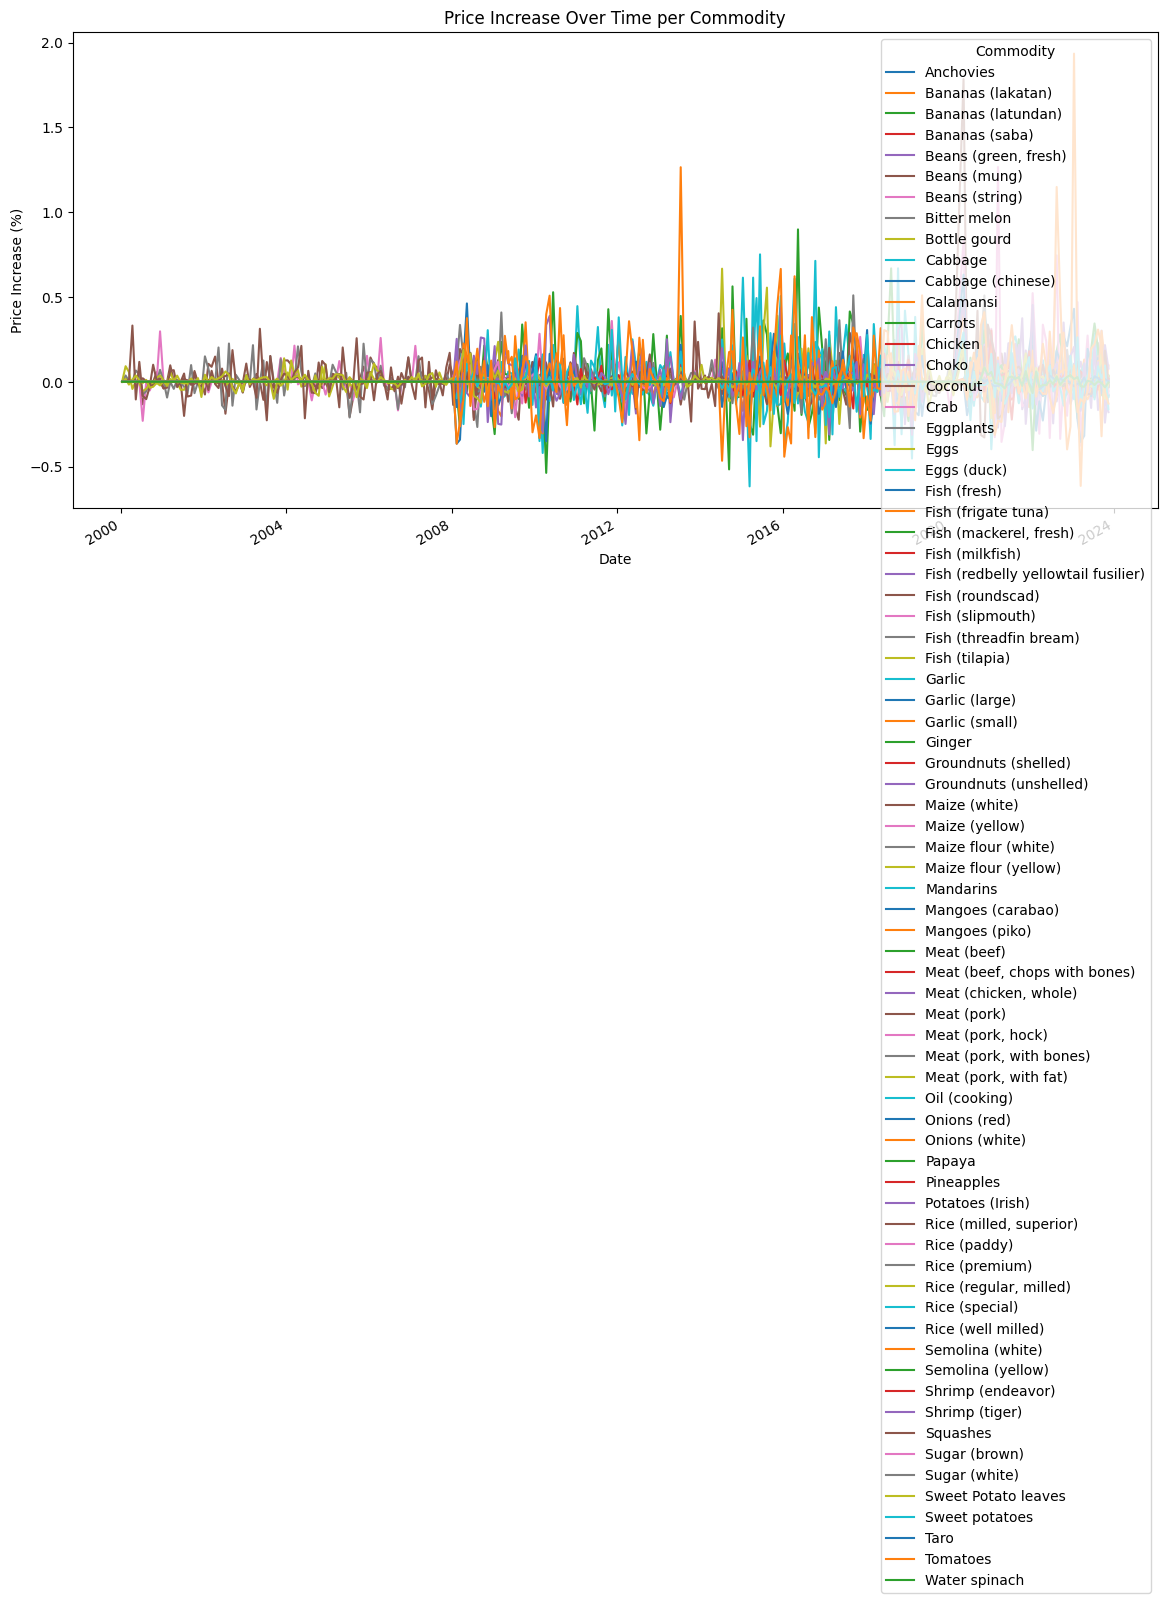

In [3]:
import matplotlib.pyplot as plt

# Parse the date column to datetime
foodData['date'] = pd.to_datetime(foodData['date'], errors='coerce')
foodData['price'] = pd.to_numeric(foodData['price'], errors='coerce')

# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()

# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')

# Calculate the price increase
price_increase = pivoted.pct_change().fillna(0)

# Plot the time series for each commodity
price_increase.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()



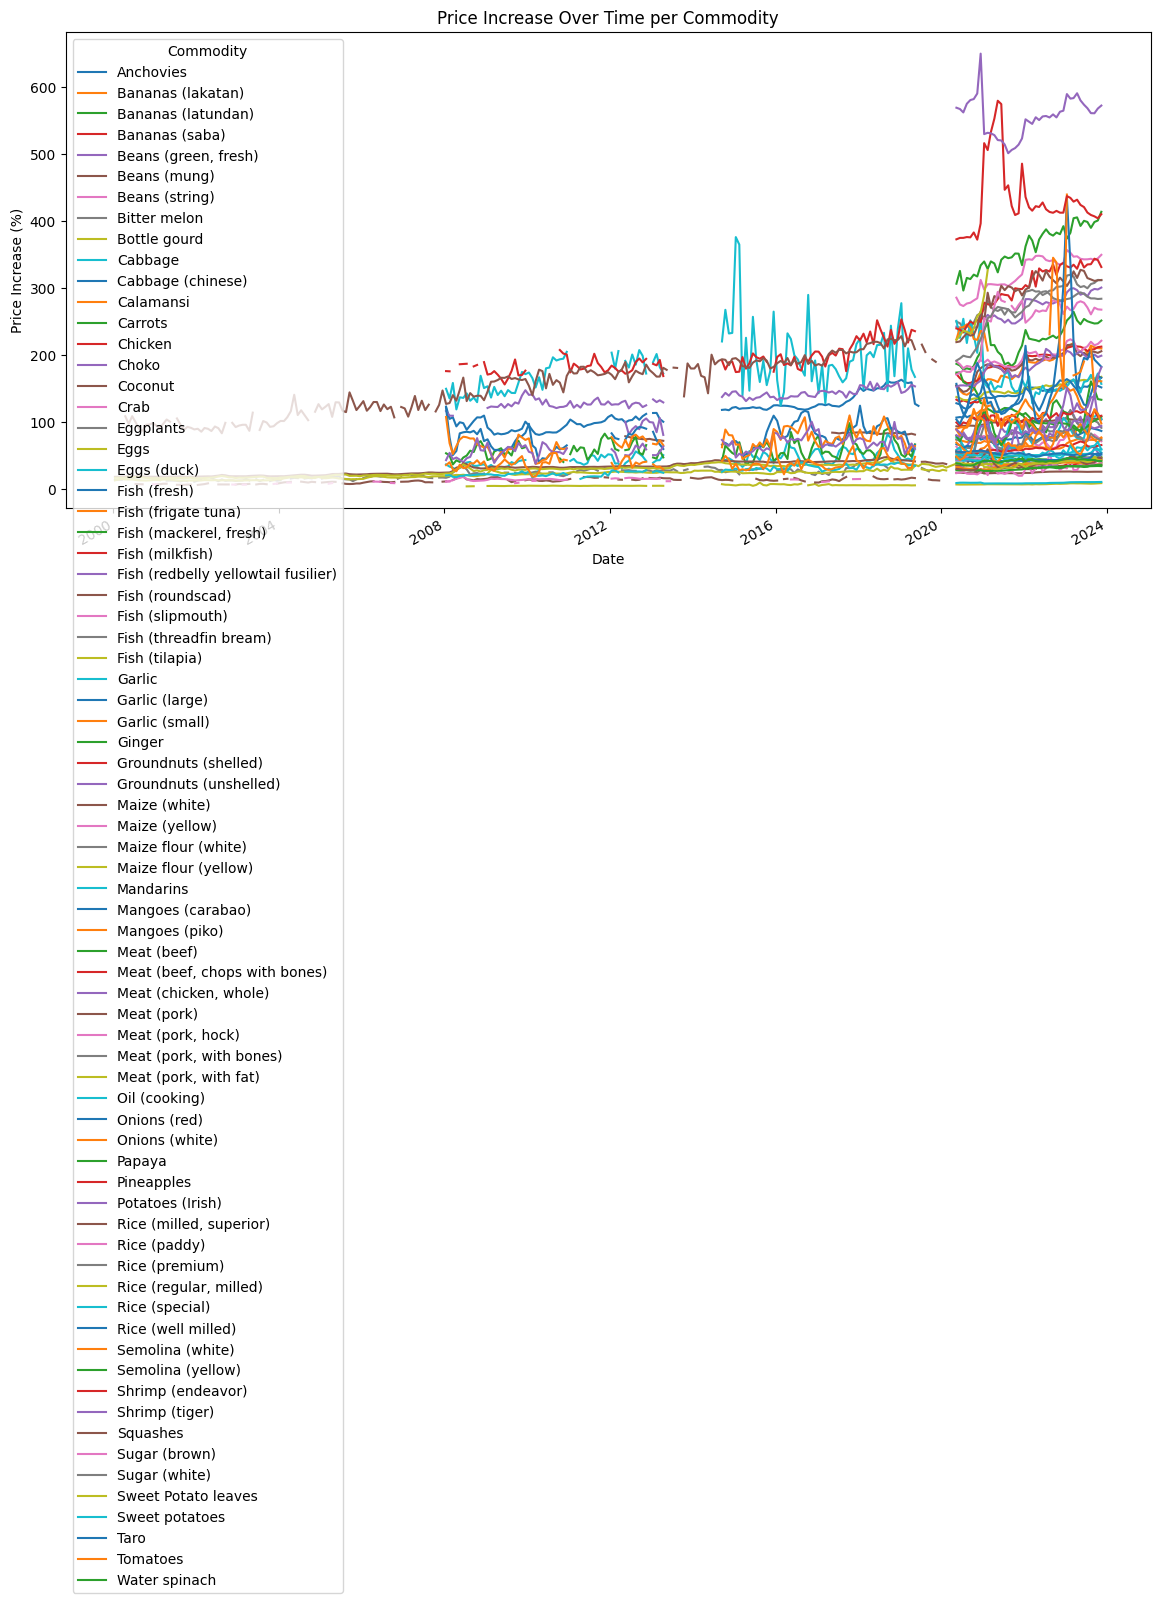

In [4]:
# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()

# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')


# Plot the time series for each commodity
pivoted.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()

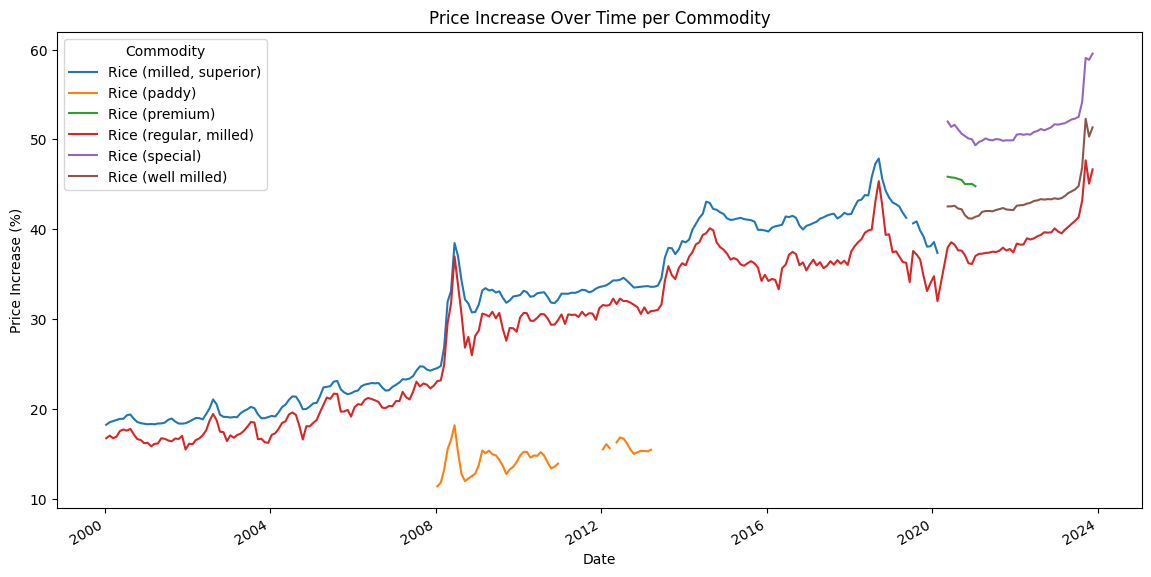

In [5]:
# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()
# Filter the grouped data to include only rows where the commodity contains 'rice' (case insensitive)
grouped = grouped[grouped['commodity'].str.contains('rice', case=False, regex=True)]
# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')


# Plot the time series for each commodity
pivoted.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9492\1838657899.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_increase = pivoted.pct_change().fillna(0)


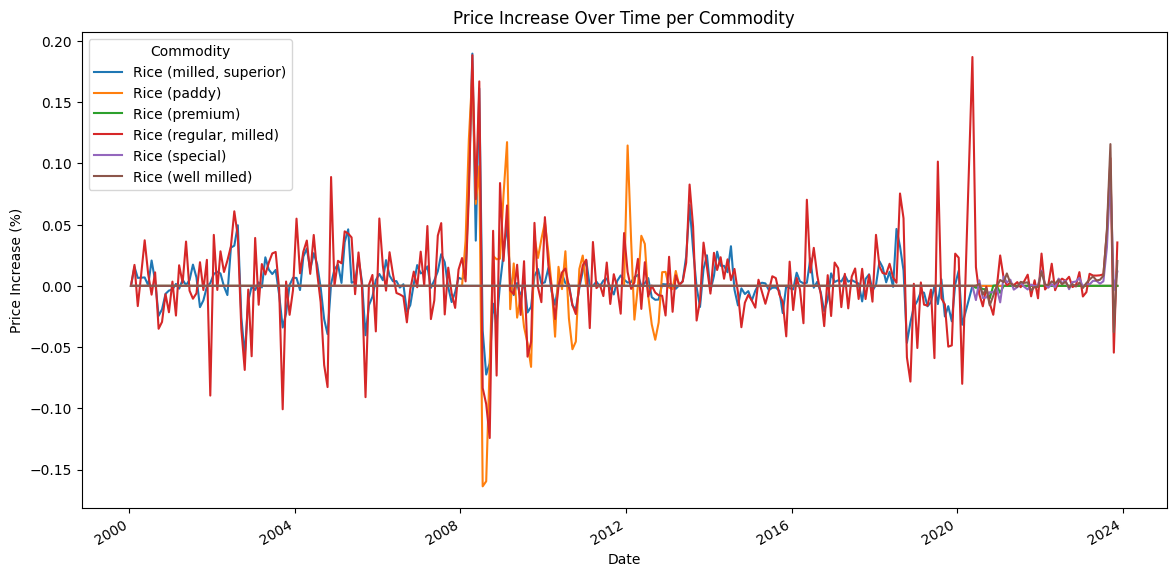

In [6]:
# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()
# Filter the grouped data to include only rows where the commodity contains 'rice' (case insensitive)
grouped = grouped[grouped['commodity'].str.contains('rice', case=False, regex=True)]
# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')

# Calculate the price increase
price_increase = pivoted.pct_change().fillna(0)

# Plot the time series for each commodity
price_increase.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()

Mean Squared Error: 8.354904144869353


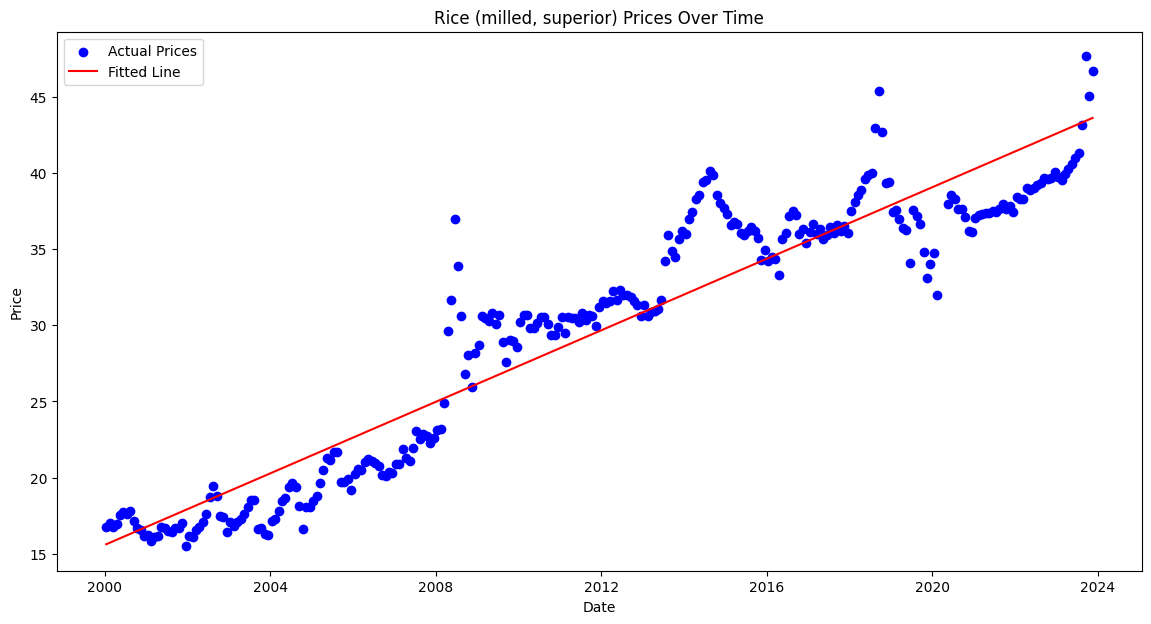

Slope of the model: 0.0032173274914917807


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Select the 'Rice (milled, superior)' prices for modeling
rice_prices = pivoted[['Rice (regular, milled)']].dropna()

# Prepare the data for modeling
X = np.array((rice_prices.index - rice_prices.index[0]).days).reshape(-1, 1)  # Convert dates to numerical values
y = rice_prices['Rice (regular, milled)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.scatter(rice_prices.index, rice_prices['Rice (regular, milled)'], color='blue', label='Actual Prices')
plt.plot(rice_prices.index, model.predict(np.array((rice_prices.index - rice_prices.index[0]).days).reshape(-1, 1)), color='red', label='Fitted Line')
plt.title('Rice (milled, superior) Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Show the slope of the model
slope = model.coef_[0]
print(f'Slope of the model: {slope}')


C:\Users\User\AppData\Local\Temp\ipykernel_9492\3109365050.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=rice_prices.index[-1], end='2040-12-31', freq='M')


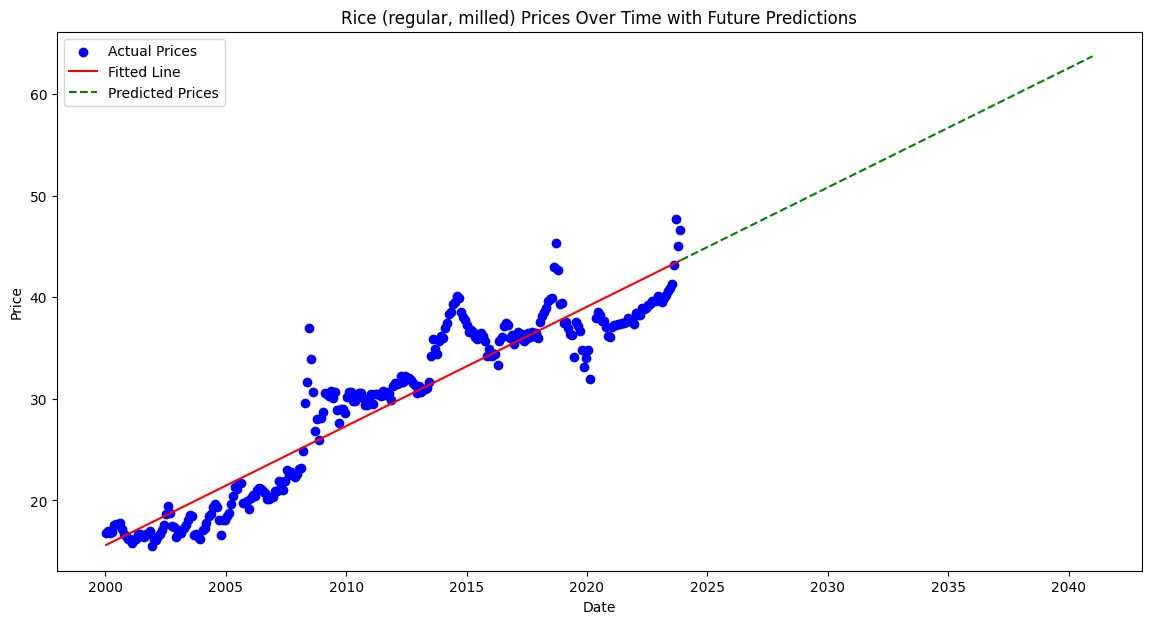

In [8]:
# Predict prices until 2040
future_dates = pd.date_range(start=rice_prices.index[-1], end='2040-12-31', freq='M')
future_X = np.array((future_dates - rice_prices.index[0]).days).reshape(-1, 1)
future_y_pred = model.predict(future_X)

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.scatter(rice_prices.index, rice_prices['Rice (regular, milled)'], color='blue', label='Actual Prices')
plt.plot(rice_prices.index, model.predict(np.array((rice_prices.index - rice_prices.index[0]).days).reshape(-1, 1)), color='red', label='Fitted Line')
plt.plot(future_dates, future_y_pred, color='green', linestyle='--', label='Predicted Prices')
plt.title('Rice (regular, milled) Prices Over Time with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The highest price increase for 'Rice (regular, milled)' occurred on 2008-04-15 00:00:00 with an increase of 18.84%.


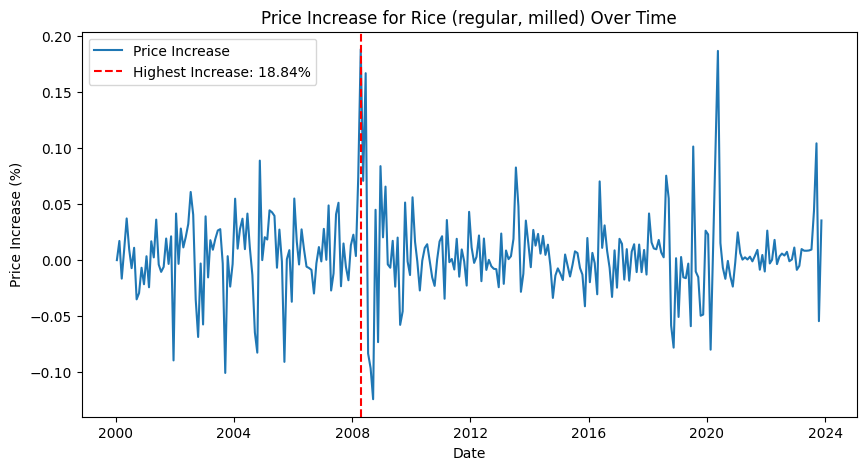

In [11]:
# Find the date with the highest price increase for 'Rice (regular, milled)'
rice_price_increase = price_increase['Rice (regular, milled)']
max_increase_date = rice_price_increase.idxmax()
max_increase_value = rice_price_increase.max()

print(f"The highest price increase for 'Rice (regular, milled)' occurred on {max_increase_date} with an increase of {max_increase_value:.2%}.")
# Plot the highest price increase for 'Rice (regular, milled)'
plt.figure(figsize=(10, 5))
plt.plot(rice_price_increase.index, rice_price_increase.values, label='Price Increase')
plt.axvline(x=max_increase_date, color='r', linestyle='--', label=f'Highest Increase: {max_increase_value:.2%}')
plt.title('Price Increase for Rice (regular, milled) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend()
plt.show()

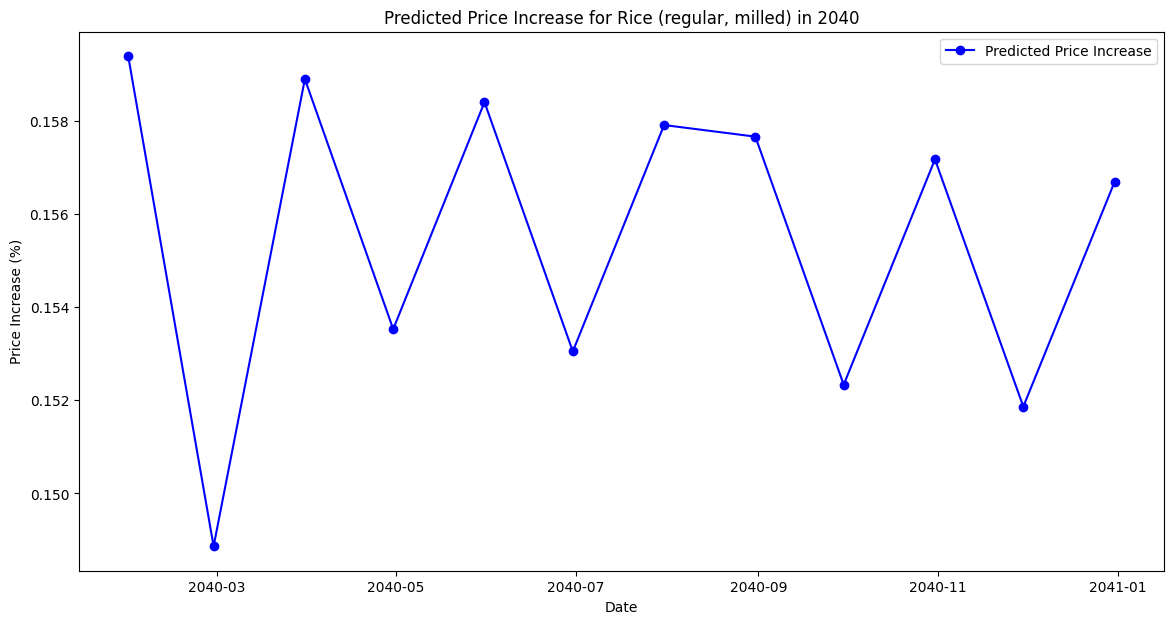

In [13]:
# Calculate the percentage increase in predicted prices for 2040
future_price_increase = (future_y_pred[1:] - future_y_pred[:-1]) / future_y_pred[:-1] * 100

# Filter the dates to include only the year 2040
future_dates_2040 = future_dates[1:][future_dates[1:].year == 2040]
future_price_increase_2040 = future_price_increase[future_dates[1:].year == 2040]

# Plot the predicted price increase for 2040
plt.figure(figsize=(14, 7))
plt.plot(future_dates_2040, future_price_increase_2040, marker='o', linestyle='-', color='b', label='Predicted Price Increase')
plt.title('Predicted Price Increase for Rice (regular, milled) in 2040')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend()
plt.show()

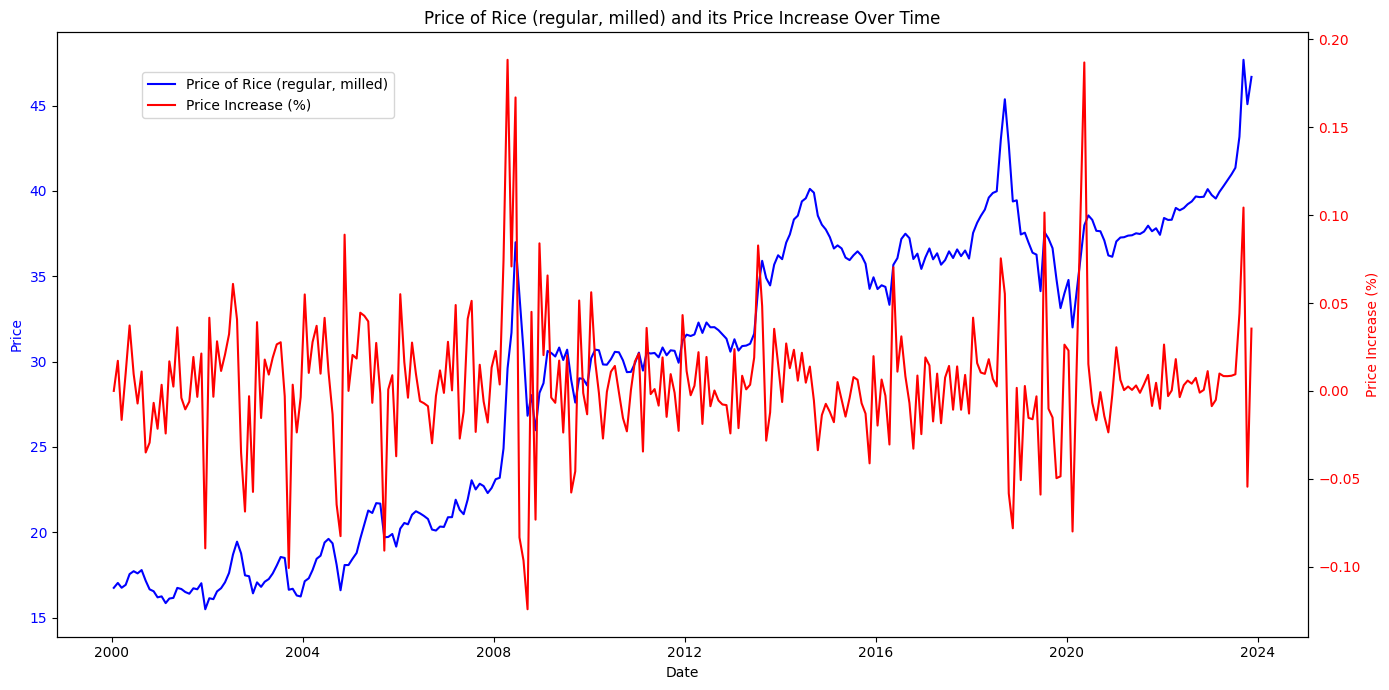

In [15]:
# Create a time series plot for the price of rice including its price increase
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the price of rice
ax1.plot(pivoted.index, pivoted['Rice (regular, milled)'], color='blue', label='Price of Rice (regular, milled)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot the price increase
ax2 = ax1.twinx()
ax2.plot(price_increase.index, price_increase['Rice (regular, milled)'], color='red', label='Price Increase (%)')
ax2.set_ylabel('Price Increase (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Price of Rice (regular, milled) and its Price Increase Over Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9492\2265550222.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=rice_prices.index[-1], end='2040-12-31', freq='M')


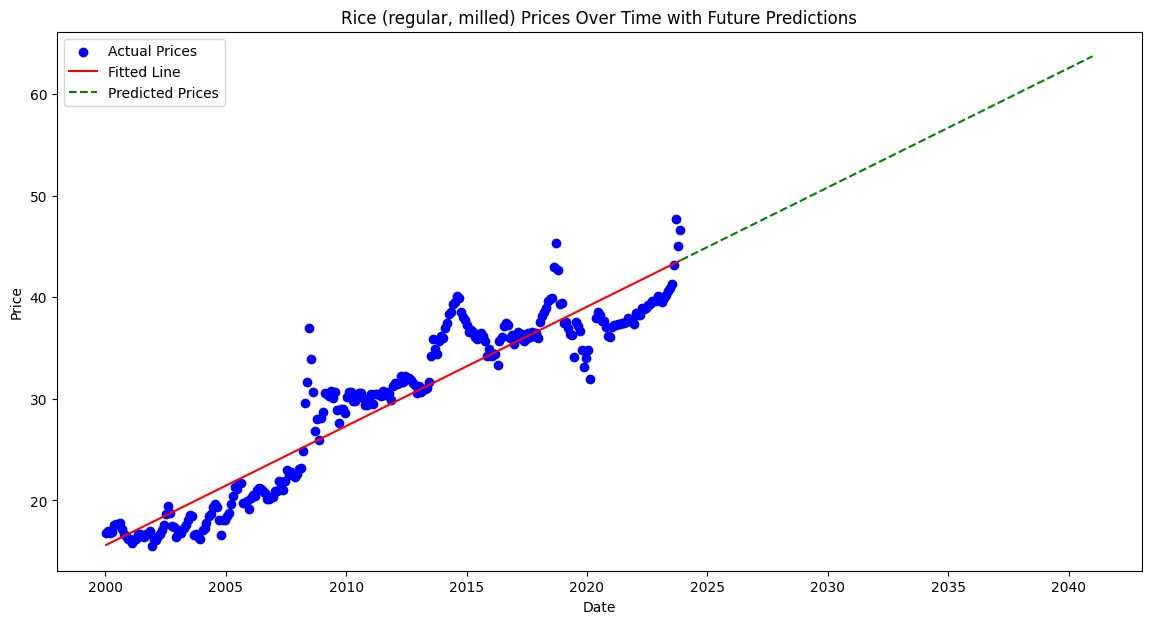

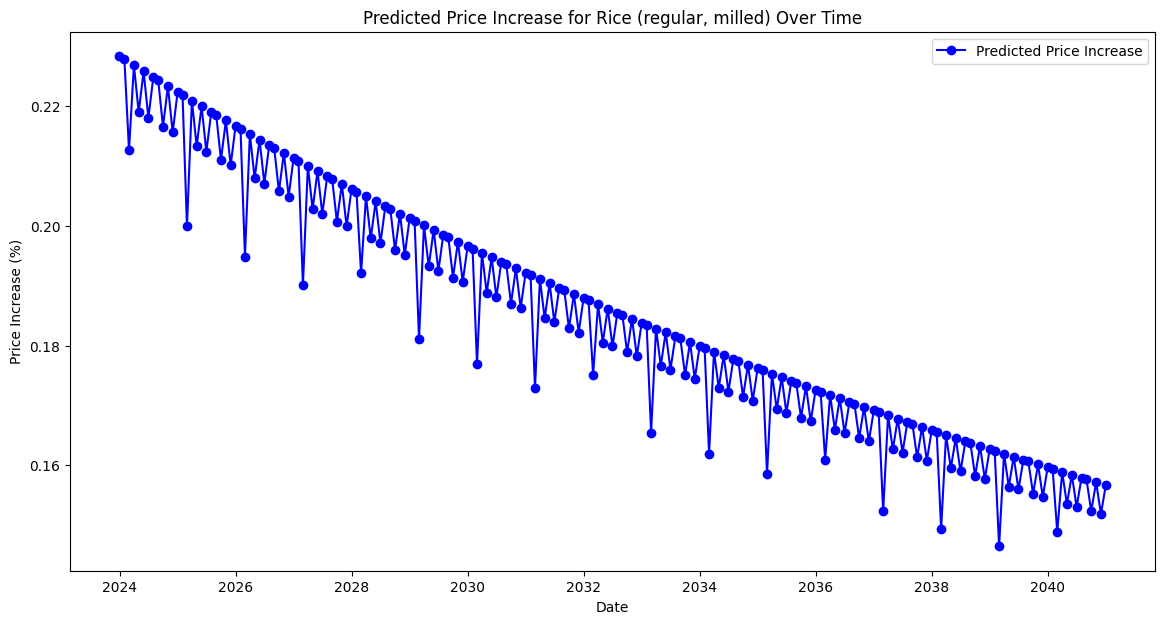

In [17]:
# Predict prices until 2040
future_dates = pd.date_range(start=rice_prices.index[-1], end='2040-12-31', freq='M')
future_X = np.array((future_dates - rice_prices.index[0]).days).reshape(-1, 1)
future_y_pred = model.predict(future_X)

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.scatter(rice_prices.index, rice_prices['Rice (regular, milled)'], color='blue', label='Actual Prices')
plt.plot(rice_prices.index, model.predict(np.array((rice_prices.index - rice_prices.index[0]).days).reshape(-1, 1)), color='red', label='Fitted Line')
plt.plot(future_dates, future_y_pred, color='green', linestyle='--', label='Predicted Prices')
plt.title('Rice (regular, milled) Prices Over Time with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
# Calculate the predicted price increase
future_price_increase = (future_y_pred[1:] - future_y_pred[:-1]) / future_y_pred[:-1] * 100

# Plot the predicted price increase
plt.figure(figsize=(14, 7))
plt.plot(future_dates[1:], future_price_increase, marker='o', linestyle='-', color='b', label='Predicted Price Increase')
plt.title('Predicted Price Increase for Rice (regular, milled) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend()
plt.show()

In [14]:
def predict_rice_price(year):
    # Ensure the year is within the range of the future predictions
    if year < 2023 or year > 2040:
        return "Year out of range. Please enter a year between 2023 and 2040."
    
    # Find the index corresponding to the given year
    year_index = future_dates.year == year
    
    # Get the predicted prices for the given year
    predicted_prices = future_y_pred[year_index]
    
    # Create a dictionary of dates and prices for the given year
    price_dict = dict(zip(future_dates[year_index], predicted_prices))
    
    return price_dict

# Example usage:
year = 2030
predicted_prices_2030 = predict_rice_price(year)
print(f"Predicted rice prices for the year {year}:")
for date, price in predicted_prices_2030.items():
    print(f"{date.date()}: {price:.2f}")

Predicted rice prices for the year 2030:
2030-01-31: 50.93
2030-02-28: 51.02
2030-03-31: 51.12
2030-04-30: 51.21
2030-05-31: 51.31
2030-06-30: 51.41
2030-07-31: 51.51
2030-08-31: 51.61
2030-09-30: 51.70
2030-10-31: 51.80
2030-11-30: 51.90
2030-12-31: 52.00
